In [8]:
from cells.hallermann2012 import iteration2
from neuron import h, gui
from helpers.record import *
import numpy as np
import copy
from importlib import reload

reload(iteration2)
config = iteration2.Config()
cellbuilder = lambda: iteration2.SPI6(config)


## Find the First Trace that has an AP within 15 ms

The first params that yield an AP within the first 15 ms are the ones that are being used (function uses 0.025mV steps)


In [9]:
from helpers import generic
reload(generic)

def findFirstApWithinMS(cellbuilder,ampstep = 0.025,ms = 15,steps = 20,delay = 100,dur = 500):
    foundtrace = None
                        
    baselinetrace = { "dur": dur, "delay": delay, "amp": 0}
    baselinetrace = generic.stimulate(cellbuilder, baselinetrace)
    timetrace = baselinetrace["t"]
    for i in range(0,steps):
        under = { "dur": dur, "delay": delay, "amp": ampstep * i}
        trace = generic.stimulate(cellbuilder, under)
        if trace["aps"].size > 0:
            if trace["aps"][0] < delay + ms:
                foundtrace = trace
                break

    return foundtrace
            

            

In [10]:
foundtrace = findFirstApWithinMS(cellbuilder, ms= 15)

aptime = foundtrace["aps"][0]
aptrace = generic.isolateTime(foundtrace, aptime)

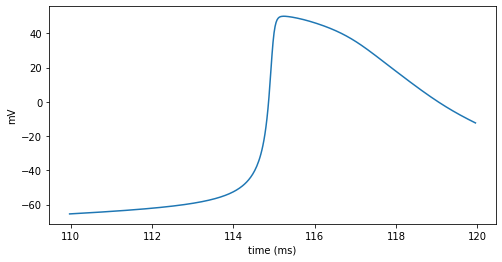

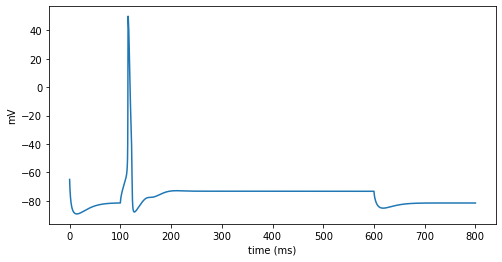

In [4]:
generic.plotTrace(aptrace)
generic.plotTrace(foundtrace)

In [6]:
from helpers import storage

In [7]:
reload(storage)
storage.pickleTrace(foundtrace, append=" first within 15", withdoc=True)

'pickles/SPI6 - Simplified Corticospinal Cell Model - Amp 0.25 first within 15.pickle'